In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
Session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
Session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

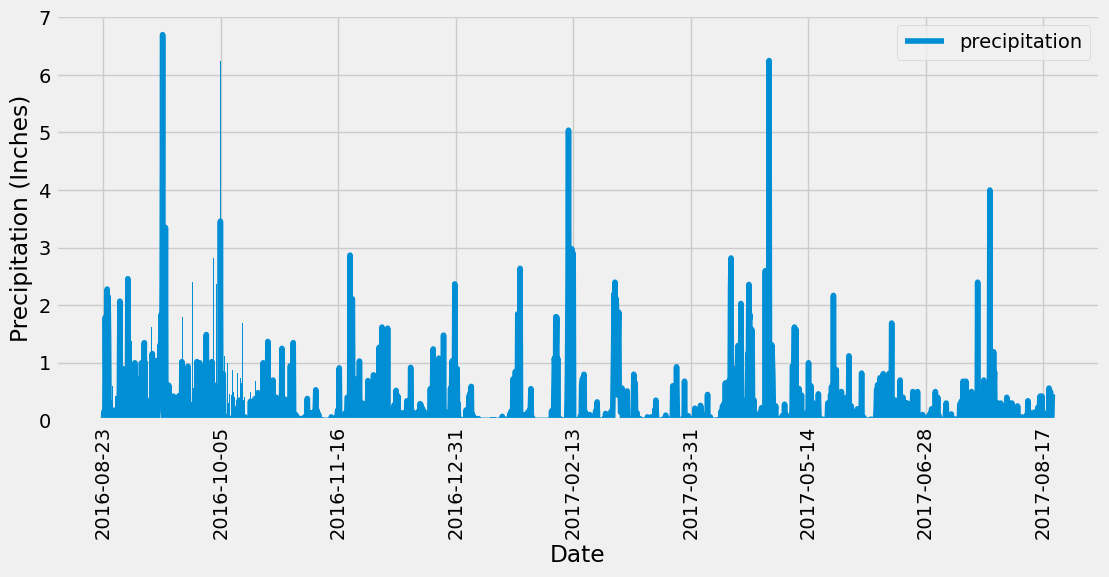

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
results_date = Session.query(Measurement.date).order_by(Measurement.date.desc()).first()
str_date = list(np.ravel(results_date))[0]
latest_date = dt.datetime.strptime(str_date,"%Y-%m-%d")
year_back = latest_date-dt.timedelta(days=366)

# Perform a query to retrieve the data and precipitation scores
precipitation_scores = Session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date.asc()).filter(Measurement.date >= year_back).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
query_results_df = pd.DataFrame(precipitation_scores)
query_results_df = query_results_df.rename(columns={'prcp':"precipitation"})

# Sort the dataframe by date
query_results_df.sort_values(by='date')
query_results_df.dropna()

# Use Pandas Plotting with Matplotlib to plot the data
Clean_query_results_df = query_results_df.dropna()
Clean_query_results_df

Clean_query_results_df.plot(x='date', y='precipitation', figsize=(12, 5), legend=True)

x_values = Clean_query_results_df ['date']
y_values = Clean_query_results_df ['precipitation']

plt.bar(x_values, y_values)
plt.xlabel('Date')
plt.ylabel('Precipitation (Inches)')
plt.xticks(rotation = "vertical")

plt.show()

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
Clean_query_results_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
Number_of_Stations = Session.query(Station.name).count()
Number_of_Stations

9

In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
Active_Stations = Session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
Active_Stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
Most_Active_Station_Temperature = Session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs).filter(Measurement.station >= 'USC00519281')).all()
Most_Active_Station_Temperature

[(53.0, 87.0, 73.56913655848132)]

<Axes: ylabel='Frequency'>

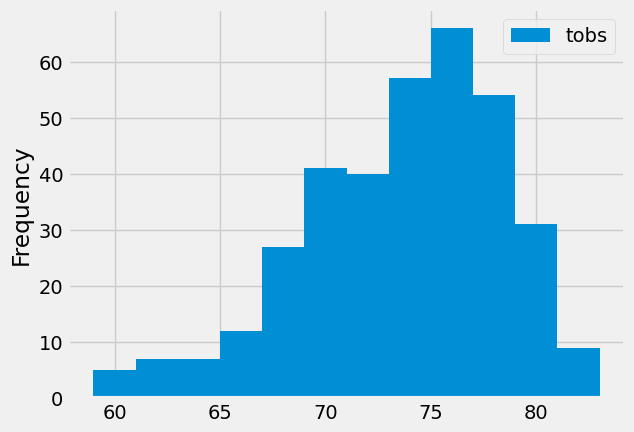

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_12mo_cutoff = '2016-08-18'

last_12mo_temperatures = Session.query(Measurement.tobs).filter((Measurement.station == 'USC00519281') & (Measurement.date > last_12mo_cutoff)).all()

last_12mo_temperatures_df = pd.DataFrame(last_12mo_temperatures)

last_12mo_temperatures_df

last_12mo_temperatures_df.plot.hist(bins=12)

# Close Session

In [18]:
# Close Session
Session.close()